# CS-746-25633-SPRING 2023

# Perspectives on Data Science

# PROJECT

Downloaded a copy of the current questionnaire results from here: https://docs.google.com/spreadsheets/d/1I9UtBsgTWwRRuJQC2JXM3FmypKmSkonvdrVu0WkM0Gg/edit#gid=0

**Topic : PREDICTION OF A PERSONS SATISFACTION LEVEL ON APARTMENTS DATA**

For the benefit of future international students wishing to enroll at Wichita State University, a dataset on apartments has been generated. We,the Students created the dataset on their own using Google Forms and distributed it to their friends. The dataset is made up of 47 columns that contain a distinct question concerning each person's current way of life in Wichita. The predictor or Dependent variable is the Overall score a person give their apartment. It ranges from **(1 - 5)** . 

#### LOAD THE DATA

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read CSV file into a Pandas DataFrame
df = pd.read_csv('questionnaire_responses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 47 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                 373 non-null    object 
 1   Are you an international student?                                                                                         373 non-null    object 
 2   This questionnaire helps the new international students coming to WSU. Do you want to fill this form?                     12 non-null     object 
 3   What is your WSU id?                                                                                                      362 non-null 

In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 373
Number of columns: 47


**Findings:** There are 47 columns and 373 rows altogether. The only available data types are float64 and object.

## DATA PRE-PROCESSING

**Findings:** There is a lot of unnecessary data in the dataset, including Timestamps and other information, and certain columns are not filled entirely from the top to the bottom. Additionally, some rows include unordered data, for example, when asked for the time, they provided the string "fffghfhg." Therefore, we made every effort to clean our dataset.

The columns are as follows : 'Timestamp','Are you an international student?','What is your current address?', 'This questionnaire helps the new international students coming to WSU. Do you want to fill this form?', 'What is your WSU id?','Since arriving in Wichita, how many times have you relocated to different places?','What was the name and address of the apartment where you previously resided?','How satisfied were you about your stay in your previous apartment?','What was the reason you vacated your previous apartment?','Where are you currently residing?','If other, Please specify where you are currently residing at.','How satisfied are you with your current stay?','Any other info/suggestions?','If other, Please specify your apartment name.','If other, please specify number of people staying with you.','What are all the amenities that are included in your rent?','How difficult is it to find a ride/cab to travel from your residence to university?','How much it costs you to travel from your residence to university?','What is the duration of time it takes you to drive from your residence to university?','Is there a free parking lot allocated to your unit?','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46'

In [4]:
# The dataset is clumsy to read so we need to remove the unwanted columns
# Drop unwanted columns from the DataFrame
df2 = df.drop(['Timestamp','Are you an international student?','What is your current address?', 'This questionnaire helps the new international students coming to WSU. Do you want to fill this form?', 'What is your WSU id?','Since arriving in Wichita, how many times have you relocated to different places?','What was the name and address of the apartment where you previously resided?','How satisfied were you about your stay in your previous apartment?','What was the reason you vacated your previous apartment?','Where are you currently residing?','If other, Please specify where you are currently residing at.','How satisfied are you with your current stay?','Any other info/suggestions?','If other, Please specify your apartment name.','If other, please specify number of people staying with you.','What are all the amenities that are included in your rent?','How difficult is it to find a ride/cab to travel from your residence to university?','How much it costs you to travel from your residence to university?','What is the duration of time it takes you to drive from your residence to university?','Is there a free parking lot allocated to your unit?','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46'], axis=1)

In [5]:
print("Number of rows:", df2.shape[0])
print("Number of columns:", df2.shape[1])

Number of rows: 373
Number of columns: 22


After droping the unwanted columns dataset now have only 22 columns with 373 entries. Now lets check for any null values in dataset.

In [6]:
#check for null values
print(df2.isnull().sum())

Where are you living currently?                                                                                               6
How long have you been in Wichita? (in months)                                                                                6
What is your apartment name? (street name if housing)                                                                        11
How many people are staying in your unit?                                                                                    11
What is the size of your unit?                                                                                               11
Overall, how satisfied are you with your current living?                                                                     11
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)     11
What are your thoughts on the level of safety in the vicinity of your residence?                        

**Findings:** Numerous null values exist with which analysis cannot be done. There is no use in analyzing the data if the target variable has no entries. Therefore, as this is the predictor variable, we would like to start by removing the column "Overall, how satisfied are you with your current living?". 

In [1]:
# drop rows with null values in a single column
df2.dropna(subset=['Overall, how satisfied are you with your current living?'], inplace=True)

NameError: name 'df2' is not defined

In [8]:
#check for null values
print(df2.isnull().sum())

Where are you living currently?                                                                                               0
How long have you been in Wichita? (in months)                                                                                0
What is your apartment name? (street name if housing)                                                                         0
How many people are staying in your unit?                                                                                     0
What is the size of your unit?                                                                                                0
Overall, how satisfied are you with your current living?                                                                      0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      0
What are your thoughts on the level of safety in the vicinity of your residence?                        

Many other missing values for different columns were set to 0 after the column "Overall, how satisfied are you with your current living?" question was removed.

The column "If yes, what is your monthly rental insurance?" have 187 missing values. So, for the row having no insurance are set to 0 which makes the count for missing values to be 0 

In [9]:
# replace null values with integer 0 in a single column
df2['If yes, what is your monthly rental insurance?'].fillna(0, inplace=True)
print(df2.isnull().sum())

Where are you living currently?                                                                                               0
How long have you been in Wichita? (in months)                                                                                0
What is your apartment name? (street name if housing)                                                                         0
How many people are staying in your unit?                                                                                     0
What is the size of your unit?                                                                                                0
Overall, how satisfied are you with your current living?                                                                      0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      0
What are your thoughts on the level of safety in the vicinity of your residence?                        

Since there are only 362 rows in total out of which 326 are the values that are being missed for the column "What is the duration of time it takes you to walk to or from WSU?" it is better to remove the column rather than filling the missing values with some values.

In [10]:
# drop the 'What is the duration of time it takes you to walk to or from WSU?' column from the dataframe
df2.drop('What is the duration of time it takes you to walk to or from WSU?', axis=1, inplace=True)

In [11]:
print(df2.isnull().sum())

Where are you living currently?                                                                                               0
How long have you been in Wichita? (in months)                                                                                0
What is your apartment name? (street name if housing)                                                                         0
How many people are staying in your unit?                                                                                     0
What is the size of your unit?                                                                                                0
Overall, how satisfied are you with your current living?                                                                      0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      0
What are your thoughts on the level of safety in the vicinity of your residence?                        

Out of 362 rows, 143 values for two columns remain lacking. Because these two variables have separate apartments and different times to get to universities, they were eliminated. Therefore, rather than using them as means or averages across time, we shall eliminate those rows.

In [12]:
# drop the 143 rows for these two columns
# 'What is the duration of time it takes you to walk from your residence to the closest transit stop?'
# 'What is the duration of time it takes for transit to reach from your stop to the university?'
df2.dropna(subset=['What is the duration of time it takes you to walk from your residence to the closest transit stop?','What is the duration of time it takes for transit to reach from your stop to the university?'], inplace=True)

**Findings:** As we can see above there are no null values present. Each column have something filled in it for eacn entry.

In [27]:
# print the number of rows and columns for new dataset after removing all unwanted values
print("Number of rows:", df2.shape[0])
print("Number of columns:", df2.shape[1])

Number of rows: 204
Number of columns: 21


In some columns of FLOAT64 datatype there are some string values like 'fffghgfg' which must be removed by making them NaN values  and later identifying them as missing values.

In [28]:
# define a list of FLOAT64 data types columns to replace non-numeric values with NaN
cols_to_replace= ['How long have you been in Wichita? (in months)', 'Overall, how satisfied are you with your current living?','On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)','What are your thoughts on the level of safety in the vicinity of your residence?','What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?','What is the duration of time it takes you to walk from your residence to the closest transit stop?','What is the duration of time it takes for transit to reach from your stop to the university?','What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?','What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?']

In [29]:
# replace non-numeric values with NaN
for col in cols_to_replace:
    df2[col] = df2[col].apply(pd.to_numeric, errors='coerce')

Now drop the rows that have null values.

### BOX 1(repeat steps below if necesary)

In [30]:
# drop rows with null values in column
# " What is the total monthly rent of your unit? ", "How many people are staying in your unit?"
df2.dropna(subset=['What is the total monthly rent of your unit?','How many people are staying in your unit?'], inplace=True)

# "If yes, what is your monthly rental insurance?"
df2.dropna(subset=['If yes, what is your monthly rental insurance?'], inplace=True)

# "What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?"
df2.dropna(subset=['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'], inplace=True)

In [31]:
# replace non-numeric values with NaN for OBJECT data types
df2['How many people are staying in your unit?'] = pd.to_numeric(df2['How many people are staying in your unit?'], errors='coerce')
df2['What is the total monthly rent of your unit?'] = pd.to_numeric(df2['What is the total monthly rent of your unit?'], errors='coerce')
df2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'] = pd.to_numeric(df2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'], errors='coerce')
df2['If yes, what is your monthly rental insurance?'] = pd.to_numeric(df2['If yes, what is your monthly rental insurance?'], errors='coerce')

In [32]:
# convert the column to floats
df2['How many people are staying in your unit?'] = df2['How many people are staying in your unit?'].astype(float)
df2['What is the total monthly rent of your unit?'] = df2['What is the total monthly rent of your unit?'].astype(float)
df2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'] = df2['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'].astype(float)
df2['If yes, what is your monthly rental insurance?'] = df2['If yes, what is your monthly rental insurance?'].astype(float)

In [33]:
df2.to_csv('q.csv',index=False)

By downloading the dataset and verifying the data there are two rows that have very high numbers rows that are indexed as 26 and 28 are removed.

Here I have put a threshold of 5000. By viewing the columns we can conform that no values of king float64 can have the value greater than 5000. For example, as per my knowledge of staying for one year in wichita there are no apartments (Where students are living) that costs more than 5000.

In [34]:
threshold = 5000

# Get the names of all float64 columns
float_cols = df2.select_dtypes(include=['float64']).columns.tolist()

# Iterate over each float64 column and remove the rows that have values greater than the threshold
for col in float_cols:
    df2 = df2.drop(df2[df2[col] > threshold].index)

In [35]:
# print the number of rows and columns
print("Number of rows:", df2.shape[0])
print("Number of columns:", df2.shape[1])

Number of rows: 172
Number of columns: 21


### *if you find any na values count below please go to BOX 1 above and run the program again

In [37]:
print(df2.isna().sum())

Where are you living currently?                                                                                             0
How long have you been in Wichita? (in months)                                                                              0
What is your apartment name? (street name if housing)                                                                       0
How many people are staying in your unit?                                                                                   0
What is the size of your unit?                                                                                              0
Overall, how satisfied are you with your current living?                                                                    0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)    0
What are your thoughts on the level of safety in the vicinity of your residence?                                      

**Findings:** "q1.csv" is the file that is used for furture models.

In [38]:
df2.to_csv('q1.csv',index=False)

No we perform the expolratory data analysis.

### EDA 

In [39]:
# determining the number of rows and colums in the dataset
df2.shape

(172, 21)

In [40]:
df2

,Where are you living currently?,How long have you been in Wichita? (in months),What is your apartment name? (street name if housing),How many people are staying in your unit?,What is the size of your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?",...,"If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",Do your apartment require guarantor?,Is your apartment pet friendly?,What is your preferred mode of transportation when leaving your residence?,What is the duration of time it takes you to walk from your residence to the closest transit stop?,What is the duration of time it takes for transit to reach from your stop to the university?,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?,What type of laundry amenities are available in your accommodation?
7,House you rent,15.0,Tall oaks,4.0,2 bed 1.5 bath,4.0,3.0,5.0,825.0,300.0,...,0.0,225.0,Don't know,Yes,Transit,5.0,5.0,5.0,5.0,Need to go to other place for this facility
9,House you rent,9.0,21W,6.0,2 bed 1.5 bath,4.0,3.0,3.0,1050.0,200.0,...,0.0,200.0,Don't know,Yes,Transit,2.0,5.0,5.0,5.0,In the apartment complex
14,Apartment,9.0,The Landing,2.0,1 bed 1 bath,2.0,2.0,3.0,795.0,335.0,...,0.0,180.0,No,Yes,Transit,2.0,5.0,2.0,2.0,In the apartment complex
15,Apartment,8.0,Tall oaks,2.0,1 bed 1 bath,4.0,5.0,5.0,690.0,1000.0,...,0.0,200.0,No,Yes,Transit,5.0,15.0,20.0,15.0,In the apartment complex
19,Apartment,9.0,Brickstone,4.0,2 bed 1.5 bath,3.0,5.0,5.0,950.0,1120.0,...,0.0,300.0,No,Yes,Transit,6.0,5.0,10.0,20.0,In the apartment complex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,House you rent,9.0,Tall oaks,3.0,2 bed 1.5 bath,5.0,5.0,5.0,790.0,100.0,...,15.0,120.0,Yes,Yes,Transit,25.0,10.0,10.0,10.0,In the apartment complex
358,Apartment,10.0,Tall oaks,2.0,1 bed 1 bath,5.0,5.0,5.0,850.0,100.0,...,10.0,80.0,Yes,Yes,Transit,25.0,10.0,5.0,10.0,In the apartment complex
360,Apartment,8.0,Brickstone,5.0,2 bed 1.5 bath,4.0,4.0,4.0,950.0,100.0,...,15.0,300.0,Don't know,Yes,Transit,7.0,7.0,10.0,10.0,In the apartment complex
363,Apartment,8.0,Brickstone,4.0,2 bed 1.5 bath,3.0,3.0,3.0,900.0,150.0,...,0.0,400.0,Don't know,Yes,Transit,30.0,10.0,15.0,25.0,In the apartment complex


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 7 to 367
Data columns (total 21 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Where are you living currently?                                                                                           172 non-null    object 
 1   How long have you been in Wichita? (in months)                                                                            172 non-null    float64
 2   What is your apartment name? (street name if housing)                                                                     172 non-null    object 
 3   How many people are staying in your unit?                                                                                 172 non-null 

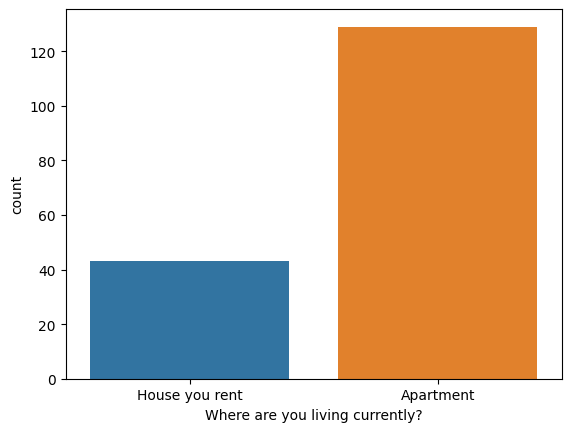

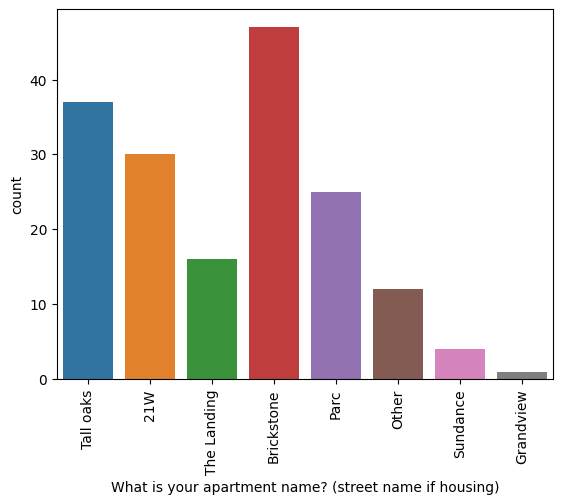

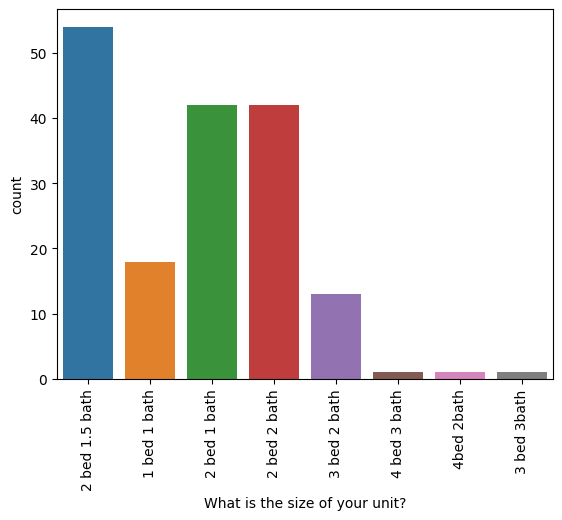

In [42]:
# Where are you living currently?
sns.countplot(x='Where are you living currently?', data=df2)
plt.show()

# What is your apartment name? (street name if housing)
a = sns.countplot(x='What is your apartment name? (street name if housing)', data=df2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.show()

# What is the size of your unit?
b = sns.countplot(x='What is the size of your unit?', data=df2)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()


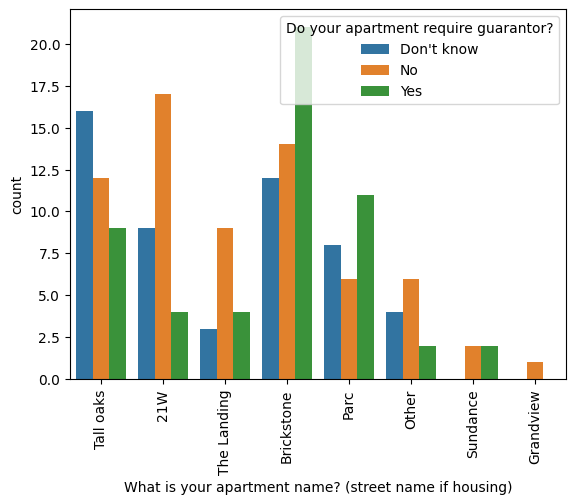

In [43]:
z= sns.countplot(x='What is your apartment name? (street name if housing)', hue='Do your apartment require guarantor?', data=df2)
z.set_xticklabels(z.get_xticklabels(), rotation=90)
plt.show()

Majority of people are living in Apartments.

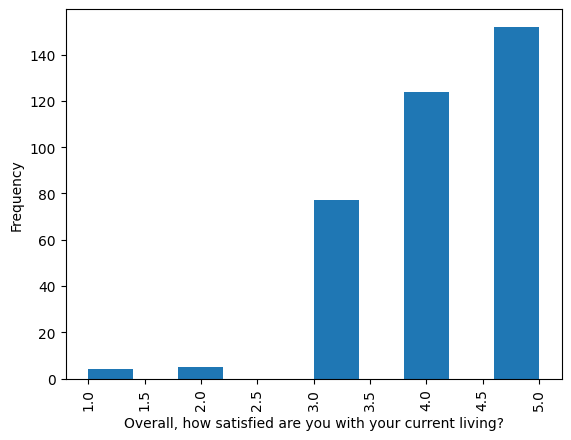

In [44]:
# Histogram of a numerical column
# Overall, how satisfied are you with your current living?
plt.hist(df['Overall, how satisfied are you with your current living?'], bins=10)
plt.xlabel('Overall, how satisfied are you with your current living?')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [45]:
# Set options to display decimal numbers instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2.describe()

,How long have you been in Wichita? (in months),How many people are staying in your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?","If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",What is the duration of time it takes you to walk from your residence to the closest transit stop?,What is the duration of time it takes for transit to reach from your stop to the university?,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?
count,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000
mean,8.713,4.488,4.093,4.076,4.174,938.721,685.593,17.111,322.355,5.387,7.983,7.744,11.651
std,3.981,1.235,0.913,0.967,0.840,198.635,580.938,31.159,295.915,5.090,4.992,4.471,8.444
min,0.700,1.000,1.000,1.000,1.000,8.000,40.000,0.000,2.000,1.100,2.000,1.000,1.000
25%,8.000,4.000,4.000,4.000,4.000,810.000,250.000,0.000,165.000,2.000,5.000,5.000,5.000
50%,9.000,4.000,4.000,4.000,4.000,950.000,500.000,0.000,250.000,5.000,7.000,5.500,10.000
75%,9.250,5.000,5.000,5.000,5.000,1055.250,1000.000,22.938,370.000,5.000,10.000,10.000,15.000
max,22.000,8.000,5.000,5.000,5.000,1600.000,3100.000,200.000,2300.000,30.000,45.000,30.000,60.000


# LINEAR REGRESSION

In [46]:
#Necesary imports required for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
OriginalFeatures = df2.columns
print('Original Features Count', len(OriginalFeatures))
print('Original Features', OriginalFeatures)

Original Features Count 21
Original Features Index(['Where are you living currently?',
       'How long have you been in Wichita? (in months)',
       'What is your apartment name? (street name if housing)',
       'How many people are staying in your unit?',
       'What is the size of your unit?',
       'Overall, how satisfied are you with your current living?',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'Are you paying rental insurance for your unit monthly?',
       'If yes, what is your monthly rental insurance?',
       'What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in you

Here in the dataset there are some categorical variables that are needed to be converted to dummies in order to pass the data through linear regression model.

In [48]:
df2 = pd.get_dummies(df2, columns = ['Where are you living currently?','What is your apartment name? (street name if housing)','What is the size of your unit?','Are you paying rental insurance for your unit monthly?','Do your apartment require guarantor?','Is your apartment pet friendly?','What is your preferred mode of transportation when leaving your residence?','What type of laundry amenities are available in your accommodation?'], drop_first = True) 

In [49]:
df2

,How long have you been in Wichita? (in months),How many people are staying in your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?","If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",What is the duration of time it takes you to walk from your residence to the closest transit stop?,...,What is the size of your unit?_3 bed 3bath,What is the size of your unit?_4 bed 3 bath,What is the size of your unit?_4bed 2bath,Are you paying rental insurance for your unit monthly?_Yes,Do your apartment require guarantor?_No,Do your apartment require guarantor?_Yes,Is your apartment pet friendly?_No,Is your apartment pet friendly?_Yes,What type of laundry amenities are available in your accommodation?_In unit/ home,What type of laundry amenities are available in your accommodation?_Need to go to other place for this facility
7,15.000,4.000,4.000,3.000,5.000,825.000,300.000,0.000,225.000,5.000,...,0,0,0,0,0,0,0,1,0,1
9,9.000,6.000,4.000,3.000,3.000,1050.000,200.000,0.000,200.000,2.000,...,0,0,0,0,0,0,0,1,0,0
14,9.000,2.000,2.000,2.000,3.000,795.000,335.000,0.000,180.000,2.000,...,0,0,0,0,1,0,0,1,0,0
15,8.000,2.000,4.000,5.000,5.000,690.000,1000.000,0.000,200.000,5.000,...,0,0,0,0,1,0,0,1,0,0
19,9.000,4.000,3.000,5.000,5.000,950.000,1120.000,0.000,300.000,6.000,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,9.000,3.000,5.000,5.000,5.000,790.000,100.000,15.000,120.000,25.000,...,0,0,0,1,0,1,0,1,0,0
358,10.000,2.000,5.000,5.000,5.000,850.000,100.000,10.000,80.000,25.000,...,0,0,0,1,0,1,0,1,0,0
360,8.000,5.000,4.000,4.000,4.000,950.000,100.000,15.000,300.000,7.000,...,0,0,0,1,0,0,0,1,0,0
363,8.000,4.000,3.000,3.000,3.000,900.000,150.000,0.000,400.000,30.000,...,0,0,0,0,0,0,0,1,0,0


In [50]:
from sklearn import linear_model
import statsmodels.api as sm
#x is independent variables
X = df2.drop(columns=['Overall, how satisfied are you with your current living?'])
#y is dependent variable
y = df2['Overall, how satisfied are you with your current living?']

In [51]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
print('coefficients: \n', reg.coef_)
c = sm.add_constant(X)
model1 = sm.OLS(y,c).fit()
model1.summary()

coefficients: 
 [-2.37902095e-02 -1.11626266e-01  4.44937790e-01  3.38100798e-01
 -2.87025749e-07  7.90840713e-06  6.57835574e-04 -1.88946852e-04
  4.36794848e-03  1.21693745e-02 -3.77534324e-02 -8.69930397e-03
  5.53184029e-02 -4.17285342e-01  6.84846595e-01 -1.94213624e-01
 -4.05188682e-01 -2.63670381e-01 -1.94344882e-01 -5.12052697e-01
  4.09260866e-01  5.13053246e-01  4.78924382e-01  4.94919604e-01
  1.51782237e-01  1.43632061e+00  1.57028989e+00  6.97284237e-02
  8.15629755e-02  2.44910080e-01  6.35002253e-01  9.33285262e-01
  3.31669526e-01 -3.06204948e-02]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                               
====================================================================================================================
Dep. Variable:     Overall, how satisfied are you with your current living?   R-squared:                       0.726
Model:                                                                  OLS   Adj. R-squared:                  0.657
Method:                                                       Least Squares   F-statistic:                     10.65
Date:                                                      Sun, 07 May 2023   Prob (F-statistic):           1.58e-24
Time:                                                              19:06:27   Log-Likelihood:                -116.70
No. Observations:                                                       172   AIC:                             303.4
Df Residuals:                                                           137   BIC:                             413.6
Df Model:                                                                34                                         
Covariance Type:                                                  nonrobust                                         
============================================================================================================================================================================================
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                        0.6932      0.433      1.603      0.111      -0.162       1.548
How long have you been in Wichita? (in months)                                                                              -0.0238      0.012     -1.939      0.055      -0.048       0.000
How many people are staying in your unit?                                                                                   -0.1116      0.058     -1.928      0.056      -0.226       0.003
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)     0.4449      0.063      7.059      0.000       0.320       0.570
What are your thoughts on the level of safety in the vicinity of your residence?                                             0.3381      0.076      4.430      0.000       0.187       0.489
What is the total monthly rent of your unit?                                                                              -2.87e-07      0.000     -0.001      0.999      -0.001       0.001
What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?           7.908e-06      9e-05      0.088      0.930      -0.000       0.000
If yes, what is your monthly rental insurance?                                                                               0.0007      0.002      0.367      0.714      -0.003       0.004
What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?              -0.0002      0.000     -1.203      0.231      -0.000       0.000
What is the duration of time it takes you to walk from your residence to the closest transit stop?                           0.0044      0.010      0.445      0.657      -0.015       0.024
What is the duration of time it takes for transit to reach from your stop to the university?                                 0.0122      0.010      1.221      0.224      -0.008       0.032
What is the approxi

## FILTER METHOD

Using the Filter method with Chi-Square scores for filtering out the best 20 features.

In [52]:
from sklearn.feature_selection import SelectKBest, chi2

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 7 to 367
Data columns (total 35 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   How long have you been in Wichita? (in months)                                                                            172 non-null    float64
 1   How many people are staying in your unit?                                                                                 172 non-null    float64
 2   Overall, how satisfied are you with your current living?                                                                  172 non-null    float64
 3   On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)  172 non-null 

In [54]:
#x is independent variables
X = df2.drop(columns=['Overall, how satisfied are you with your current living?'])
#y is dependent variable
y = df2['Overall, how satisfied are you with your current living?']

In [55]:
# Convert X to numpy array
X_array = X.to_numpy()

In [56]:
# Apply chi-square test
chi2_selector = SelectKBest(chi2, k=25)
X_kbest = chi2_selector.fit_transform(X_array, y)

In [57]:
# Get selected feature indices
feature_indices = chi2_selector.get_support(indices=True)

In [58]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 34
Reduced number of features: 25


In [59]:
# Get selected feature names
selected_features = X.columns[feature_indices]

In [60]:
print("SELECTED FEATURES:\n", selected_features)

SELECTED FEATURES:
 Index(['How long have you been in Wichita? (in months)',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'If yes, what is your monthly rental insurance?',
       'What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?',
       'What is the duration of time it takes you to walk from your residence to the closest transit stop?',
       'What is the duration of time it takes for transit to reach from your stop to the university?',
       'What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?',
       'What is 

In [61]:
from sklearn import linear_model
import statsmodels.api as sm
#x is independent variables
X = df2[selected_features].values
#y is dependent variable
y = df2['Overall, how satisfied are you with your current living?']

In [62]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
print('coefficients: \n', reg.coef_)
c = sm.add_constant(X)
model1 = sm.OLS(y,c).fit()
model1.summary()

coefficients: 
 [-1.21241012e-02  4.45202312e-01  3.46017170e-01 -9.34963072e-05
  3.47401643e-05 -5.62080189e-04 -2.24579111e-04  1.67368480e-03
  5.86189134e-03 -3.80907121e-02 -1.12381945e-02  5.26743221e-02
 -2.38668795e-01  5.01499774e-02 -6.53572798e-02 -4.08305824e-01
  1.37858751e-01  1.26050609e-01 -5.95411178e-01  6.36035699e-02
  1.13297545e-01  2.75707610e-01  8.14954566e-01  8.40520300e-01
  3.60571724e-01]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                               
====================================================================================================================
Dep. Variable:     Overall, how satisfied are you with your current living?   R-squared:                       0.701
Model:                                                                  OLS   Adj. R-squared:                  0.650
Method:                                                       Least Squares   F-statistic:                     13.68
Date:                                                      Sun, 07 May 2023   Prob (F-statistic):           4.99e-27
Time:                                                              19:06:39   Log-Likelihood:                -124.12
No. Observations:                                                       172   AIC:                             300.2
Df Residuals:                                                           146   BIC:                             382.1
Df Model:                                                                25                                         
Covariance Type:                                                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5079      0.389      1.305      0.194      -0.261       1.277
x1            -0.0121      0.011     -1.083      0.281      -0.034       0.010
x2             0.4452      0.062      7.141      0.000       0.322       0.568
x3             0.3460      0.075      4.629      0.000       0.198       0.494
x4          -9.35e-05      0.000     -0.348      0.729      -0.001       0.000
x5          3.474e-05   8.34e-05      0.417      0.677      -0.000       0.000
x6            -0.0006      0.002     -0.329      0.743      -0.004       0.003
x7            -0.0002      0.000     -1.445      0.151      -0.001    8.25e-05
x8             0.0017      0.010      0.174      0.862      -0.017       0.021
x9             0.0059      0.010      0.610      0.543      -0.013       0.025
x10           -0.0381      0.014     -2.756      0.007      -0.065      -0.011
x11           -0.0112      0.007     -1.643      0.103      -0.025       0.002
x12            0.0527      0.110      0.479      0.633      -0.165       0.270
x13           -0.2387      0.131     -1.823      0.070      -0.497       0.020
x14            0.0501      0.217      0.232      0.817      -0.378       0.478
x15           -0.0654      0.151     -0.434      0.665      -0.363       0.232
x16           -0.4083      0.182     -2.249      0.026      -0.767      -0.049
x17            0.1379      0.129      1.066      0.288      -0.118       0.393
x18            0.1261      0.109      1.161      0.248      -0.089       0.341
x19           -0.5954      0.625     -0.953      0.342      -1.830       0.639
x20            0.0636      0.110      0.577      0.565      -0.154       0.282
x21            0.1133      0.111      1.019      0.310      -0.106       0.333
x22            0.2757      0.116      2.381      0.019       0.047       0.505
x23            0.8150      0.294      2.774      0.006       0.234       1.395
x24            0.8405      0.174      4.827      0.000       0.496       1.185
x25            0.3606      0.156      2.313      0.022       0.053       0.669
==============================================================================
Omnibus:                       13.806   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.904
Skew:                          -0.497   Prob(JB):                     7.85e-05
Kurtosis:                       4.285   Cond. No.         